# Assignment 2 Models Results
<b>Name:</b> Justin Aaron Kelley<br>
<b>Student ID:</b> 997351<br>
<b>Date last modified:</b> 15/05/2021<br>

In [2]:
import numpy as np
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.stats import pearsonr
from sklearn import tree, neighbors
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
MAX_ITERATIONS = 5000
DEFAULT = 5
ALL = 1
SEPERATOR_MAIN = "###################################################################"
SEPERATOR = "*******************************************************************"

In [4]:
def preprocess(inclusion=ALL, validation_set = True):
    """Takes the raw data for the recipes and the Doc2Vec50 data for them
    and combines them into a single database for both the training and test
    data."""
    
    # Get the Doc2Vec50 data for training and test data.
    trainNameDoc2Vec = pd.read_csv(r"recipe_text_features_doc2vec50/train_name_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
    trainIngrDoc2Vec = pd.read_csv(r"recipe_text_features_doc2vec50/train_ingr_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
    trainStepsDoc2Vec = pd.read_csv(r"recipe_text_features_doc2vec50/train_steps_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
    testNameDoc2Vec = pd.read_csv(r"recipe_text_features_doc2vec50/test_name_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
    testIngrDoc2Vec = pd.read_csv(r"recipe_text_features_doc2vec50/test_ingr_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
    testStepsDoc2Vec = pd.read_csv(r"recipe_text_features_doc2vec50/test_steps_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
    
    
    # Get raw data for training.
    data = pd.read_csv("recipe_train.csv")
    trainData = data[["n_steps", "n_ingredients"]]
    trainLabel = data["duration_label"]

    
    # Get raw data for testing.
    data = pd.read_csv("recipe_test.csv")
    testData = data[["n_steps", "n_ingredients"]]
    
    
    # Combine data for training and testing. The features used depends on the selection.
    # Use all featues by default.
    if inclusion == 1:
        trainTextDoc2Vec = [trainNameDoc2Vec, trainIngrDoc2Vec, trainStepsDoc2Vec, trainData]
        testTextDoc2Vec = [testNameDoc2Vec, testIngrDoc2Vec, testStepsDoc2Vec, testData]
    elif inclusion == 2:
        trainTextDoc2Vec = [trainStepsDoc2Vec]
        testTextDoc2Vec = [testStepsDoc2Vec]
    elif inclusion == 3:
        trainTextDoc2Vec = [trainStepsDoc2Vec, trainData]
        testTextDoc2Vec = [testStepsDoc2Vec, testData]
    elif inclusion == 4:
        trainTextDoc2Vec = [trainNameDoc2Vec, trainIngrDoc2Vec]
        testTextDoc2Vec = [testNameDoc2Vec, testIngrDoc2Vec]
    Xtrain = pd.concat(trainTextDoc2Vec, axis=1)
    Xtest = pd.concat(testTextDoc2Vec, axis=1)
    
    
    # Convert data to numpy arrays.
    Xtrain = Xtrain.to_numpy(dtype=float)
    Xtest = Xtest.to_numpy(dtype=float)
    ytrain = trainLabel.to_numpy(dtype=int)
    

    if validation_set:
        # Split training set further into an unseen test set and a training set to be
        # split into training and validation data.
        X_train, X_unseen_test, y_train, y_unseen_test = train_test_split(Xtrain, ytrain, test_size=0.20, random_state=42)

        return X_train, y_train, X_unseen_test, y_unseen_test, Xtest  
    elif not validation_set:
        return Xtrain, ytrain, Xtest  

###################################################################
Accuracy score is 0.715 with confusion matrix for Logistic Regression:


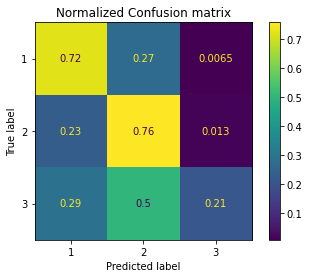

###################################################################


In [15]:
def Logistic(Xtrain, Xtest, ytrain, ytest, max_iterations=MAX_ITERATIONS):
    """Uses the Logistic Regression model on the data. Returns the score
    and a confusion matrix."""
    
    # Set up model.
    clf = LogisticRegression(random_state=0, max_iter = max_iterations).fit(Xtrain, ytrain)
    
     # Compute score and confusin matrix.
    return clf.score(Xtest, ytest), plot_confusion_matrix(clf, Xtest, ytest, normalize = 'true')

def runLogistic():
    """Runs final logistic regression model by itself to show results on unseen test data."""
    
    # Get and process training, test and validation data from files. 
    Xtrain, ytrain, Xtest, ytest = preprocess()[0:4]
    X_train, X_validation, y_train, y_validation = train_test_split(Xtrain, ytrain, test_size=0.33, random_state=42)
    
    # Run Model.
    results = Logistic(X_train, Xtest, y_train, ytest, max_iterations=MAX_ITERATIONS)
    
    print(SEPERATOR_MAIN)
    print(f"Accuracy score is {results[0]} with confusion matrix for Logistic Regression:")
    plt.title("Normalized Confusion matrix")
    plt.show()
    print(SEPERATOR_MAIN)

runLogistic()

In [10]:
def GaussianNaiveBayes(Xtrain, Xtest, ytrain, ytest):
    """Uses the Gaussian Naive Bayes model on the data. Returns the score
    and a confusion matrix."""
    

    clf = LogisticRegression(random_state=0, max_iter = 4000).fit(Xtrain, ytrain)
    print(clf.score(Xtest, ytest))
    
    clf = LogisticRegression(random_state=0, max_iter = 4000, C = 0.05).fit(Xtrain, ytrain)
    print(clf.score(Xtest, ytest))
    
    clf = LogisticRegression(random_state=0, max_iter = 4000, C = 0.1).fit(Xtrain, ytrain)
    print(clf.score(Xtest, ytest))
    
    clf = LogisticRegression(random_state=0, max_iter = 4000, C = 0.2).fit(Xtrain, ytrain)
    print(clf.score(Xtest, ytest))
    
    clf = LogisticRegression(random_state=0, max_iter = 4000, C = 0.1).fit(Xtrain, ytrain)
    print(clf.score(Xtest, ytest))
    
    clf = LogisticRegression(random_state=0, max_iter = 4000, C = 5).fit(Xtrain, ytrain)
    print(clf.score(Xtest, ytest))

def runGNB():
    """Runs final GNB model by itself to show results on unseen test data."""
    
    # Get and process training, test and validation data from files. 
    Xtrain, ytrain, Xtest, ytest = preprocess()[0:4]
    X_train, X_validation, y_train, y_validation = train_test_split(Xtrain, ytrain, test_size=0.33, random_state=42)
    
    # Select best k values using mutual information.
    mi = SelectKBest(mutual_info_classif, k=30)
    X_train_mi = mi.fit_transform(X_train,y_train)
    Xtest_mi = mi.transform(Xtest)
    
    # Run Model.
    GaussianNaiveBayes(X_train_mi, Xtest_mi, y_train, ytest)
    
    #print(SEPERATOR_MAIN)
    #print(f"Accuracy score is {results[0]} with confusion matrix for GNB:")
    #plt.title("Normalized Confusion matrix")
    #plt.show()
    #print(SEPERATOR_MAIN)

runGNB()

0.70175
0.70275
0.701875
0.70175
0.701875
0.701625


###################################################################
Accuracy score is 0.687875 with confusion matrix for KNN:


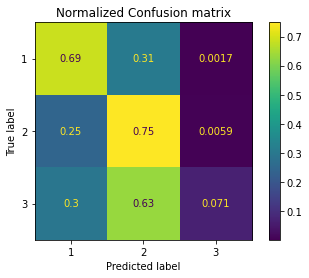

###################################################################


In [16]:
def KNN(Xtrain, Xtest, ytrain, ytest, n_neighbors=DEFAULT, weight="distance", dis_metric="minkowski"):
    """Uses the K nearest neighbours model on the data. Returns the score
    and a confusion matrix."""
    
    # Set up model.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weight, metric=dis_metric).fit(Xtrain, ytrain)
    
    # Compute score and confusin matrix.
    return clf.score(Xtest, ytest), plot_confusion_matrix(clf, Xtest, ytest, normalize = 'true')

def runKNN():
    """Runs final KNN model by itself to show results on unseen test data."""
    
    # Get and process training, test and validation data from files. 
    Xtrain, ytrain, Xtest, ytest = preprocess()[0:4]
    X_train, X_validation, y_train, y_validation = train_test_split(Xtrain, ytrain, test_size=0.33, random_state=42)
    
    # Run Model.
    results = KNN(X_train, Xtest, y_train, ytest, n_neighbors=11)
    
    print(SEPERATOR_MAIN)
    print(f"Accuracy score is {results[0]} with confusion matrix for KNN:")
    plt.title("Normalized Confusion matrix")
    plt.show()
    print(SEPERATOR_MAIN)

runKNN()